# Problem Statement
## Develop a machine learning method to predict how people will rate movies, books etc

## Imorting Modules

In [218]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("dark_background")

In [219]:
df=pd.read_csv('movies.csv')

In [220]:
df.head()

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008


### Checking if any value in df is null

In [221]:
df.isnull().value_counts()

Film   Genre  Lead Studio  Audience score %  Profitability  Rotten Tomatoes %  Worldwide Gross  Year 
False  False  False        False             False          False              False            False    77
dtype: int64

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [223]:
df.columns

Index(['Film', 'Genre', 'Lead Studio', 'Audience score %', 'Profitability',
       'Rotten Tomatoes %', 'Worldwide Gross', 'Year'],
      dtype='object')

In [224]:
df["Lead Studio"].unique()

array(['The Weinstein Company', 'Independent', 'Disney', 'Fox',
       '20th Century Fox', 'Warner Bros.', 'Summit', 'Paramount', 'CBS',
       'New Line', 'Sony', 'Universal', 'Lionsgate'], dtype=object)

### Encoding lead studio by LabelEncoder

In [225]:
from sklearn.preprocessing import LabelEncoder

In [226]:
# creating instance of labelencoder
labelencoder = LabelEncoder()


In [227]:
df['Lead Studio']= labelencoder.fit_transform(df['Lead Studio'])

In [228]:
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,10,70,1.747542,64,$41.94,2008
1,Youth in Revolt,Comedy,10,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,4,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,2,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,3,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,4,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,11,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,4,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,3,71,5.343622,40,$160.31,2008


### Removing dollar sign from World wide gross

In [229]:
for i in range(df.shape[0]):
    df["Worldwide Gross"][i] = float(df["Worldwide Gross"][i].split("$")[1])

D:\Softwares\Anaconda\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [230]:
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,10,70,1.747542,64,41.94,2008
1,Youth in Revolt,Comedy,10,52,1.090000,68,19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,4,35,1.211818,43,26.66,2010
3,When in Rome,Comedy,2,44,0.000000,15,43.04,2010
4,What Happens in Vegas,Comedy,3,72,6.267647,28,219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,4,84,0.652603,54,29.37,2007
73,A Serious Man,Drama,11,64,4.382857,89,30.68,2009
74,A Dangerous Method,Drama,4,89,0.448645,79,8.97,2011
75,27 Dresses,Comedy,3,71,5.343622,40,160.31,2008


### converting world wide gross from object to float

In [231]:
df["Worldwide Gross"] = df["Worldwide Gross"].astype(float, errors = 'raise')

### Heatmap to select column having high corr with audience score

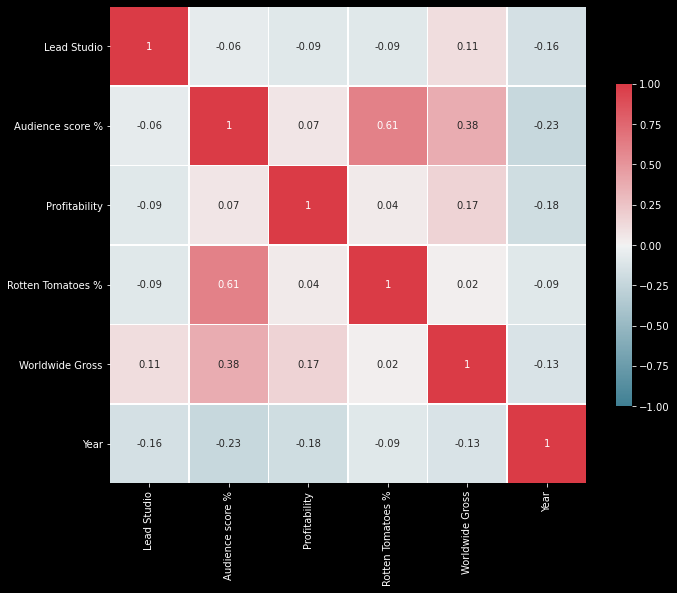

In [269]:
#generate the corelation matrix 
corr=df.corr().round(2)
#mask for the upper triangle
mask=np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]
# Set figure size
f, ax = plt.subplots(figsize=(10, 10))

#define custom colormap
cmap=sns.diverging_palette(220,10, as_cmap=True)

#draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()
plt.savefig("heatmap.png")

### converting data into X and Y

#### Selecting Rotten Tomatoes %,  Worldwide Gross because of high corr with audience sore

In [233]:
feature_cols = ['Rotten Tomatoes %' ,'Worldwide Gross']

In [234]:
x = df[feature_cols]
y = df["Audience score %"]

In [235]:
x = df[feature_cols]
x = x.astype(float)

In [236]:
x = np.array(x)
y = np.array(y)
x = x.reshape(-1,2)
y = y.reshape(-1,1)

In [237]:
x=np.array(x)
y=np.array(y)
y=y.reshape(-1,1)

### Converting x and y to train test split

In [271]:
from sklearn.model_selection import train_test_split

In [264]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.2, random_state=42)

### Using linear regression to fit x_train and y_train

In [270]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import explained_variance_score

In [265]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

### Score on trained data

In [277]:
trained_data_score = lr.score(x_train , y_train)
trained_data_score = round(trained_data_score*100)
print("R square score on trained data ", trained_data_score)

R square score on trained data  54.0


### Score on Testing data

In [278]:
test_data_score = lr.score(x_test,y_test)
test_data_score =  round(test_data_score*100)
print("R square Score on tesing data" , test_data_score)

R square Score on tesing data 39.0


### Visualizing reasult

In [243]:
prediction = model.predict(x_test)

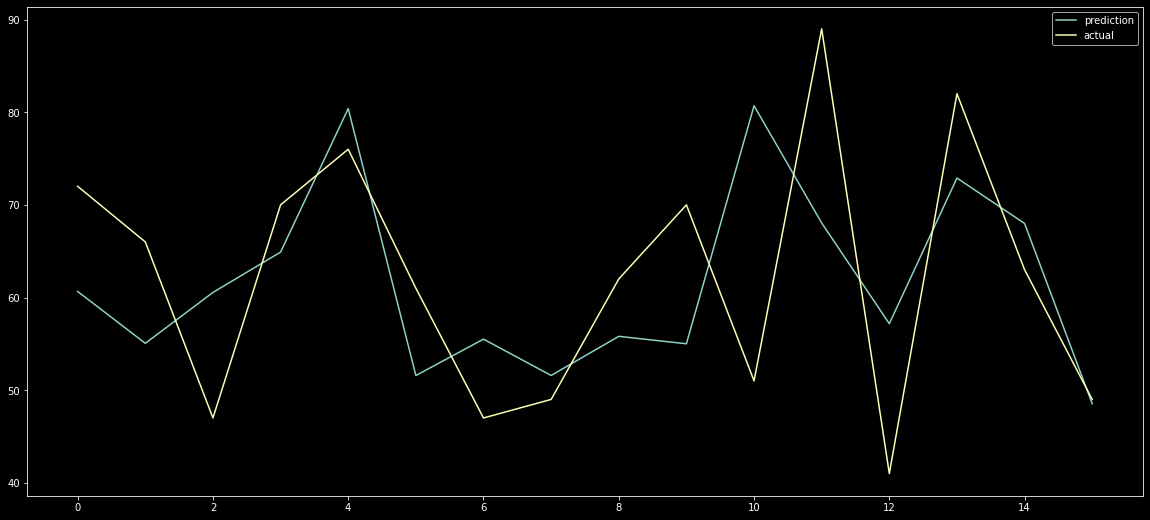

In [268]:
plt.figure(figsize=(20,9))
plt.plot(pred,label = "prediction")
plt.plot(y_test, label = "actual")
plt.legend()
plt.savefig("curve.png")